<a href="https://colab.research.google.com/github/quarcs-lab/book-2020-spatial-analysis-methods-and-practice/blob/master/Lab1/Lab1_GettingToKnowDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 01: Getting to know the dataset with Python

## Install libraries

In [1]:
!pip install -q geopandas
!pip install -q libpysal
!pip install -q mapclassify
!pip install -q splot
!pip install -q legendgram
!pip install -q esda
!pip install -q inequality
!pip install -q giddy
!pip install -q ipywidgets 

     |████████████████████████████████| 931kB 8.3MB/s 
     |████████████████████████████████| 14.7MB 304kB/s 
     |████████████████████████████████| 10.9MB 38.7MB/s 
     |████████████████████████████████| 2.4MB 8.7MB/s 
     |████████████████████████████████| 51kB 3.5MB/s 
     |████████████████████████████████| 71kB 5.3MB/s 
     |████████████████████████████████| 266kB 14.1MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 235kB 17.1MB/s 


## Load libraries

In [0]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import palettable.matplotlib as mplpal
%matplotlib inline

from libpysal import examples
from libpysal.weights.contiguity import Queen
from libpysal import weights

import mapclassify

from legendgram import legendgram

import splot
from splot.esda import plot_moran
from splot.esda import moran_scatterplot
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

import esda
from esda.moran import Moran
from esda.moran import Moran_Local
from esda.moran import Moran_BV, Moran_Local_BV

from giddy.directional import Rose

from ipywidgets import interact, fixed
import ipywidgets as widgets

from scipy.stats.kde import gaussian_kde

import os

#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
##plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-dark')
#plt.style.use('bmh')

## Data prepration

### Import datasets

In [3]:
# Clone entire Github repository
!git clone -l -s git://github.com/quarcs-lab/book-2020-spatial-analysis-methods-and-practice.git cloned-repo
%cd cloned-repo
# Show contents of repo
#!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 400, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (234/234), done.
remote: Total 400 (delta 155), reused 390 (delta 150), pack-reused 0
Receiving objects: 100% (400/400), 10.95 MiB | 13.66 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/cloned-repo


In [5]:
# read shapefile 
gdf = gpd.read_file("/content/cloned-repo/Lab1/GeoDa/CityGeoDa.shp")
gdf

,Municipali,PostCode,Population,SecondaryE,University,Phd_Master,Income,Insurance,Rent,Expenses,Area,Regimes,Density,Foreigners,Owners,geometry
0,ATHENS,10434,7063,51.28,19.82,1.81,15451.63,212.98,632.04,178.583919,3.322201e+05,2,0.02,28.67,36.28,"POLYGON ((475913.572 4205144.087, 475915.290 4..."
1,ATHENS,10435,4900,42.29,9.00,0.90,10992.85,118.41,623.70,79.890622,2.805819e+05,2,0.02,22.04,37.41,"POLYGON ((474945.127 4203977.328, 474949.878 4..."
2,ATHENS,10436,3221,45.76,11.27,0.56,10294.89,108.40,624.93,72.294562,2.079681e+05,2,0.02,35.70,30.22,"POLYGON ((475200.579 4204194.646, 475202.300 4..."
3,ATHENS,10440,10919,51.41,13.75,0.96,13460.39,116.00,610.38,98.658519,2.406351e+05,2,0.05,29.01,34.68,"POLYGON ((475457.791 4205205.622, 475539.603 4..."
4,ATHENS,10442,8036,46.04,8.55,0.54,12498.30,146.16,492.59,99.116531,1.315989e+06,2,0.01,12.88,49.19,"POLYGON ((473381.623 4204847.057, 473360.125 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,ATHENS,11743,17220,43.60,22.03,2.93,12527.34,157.93,610.24,115.396884,6.008519e+05,2,0.03,12.04,43.48,"POLYGON ((475917.556 4201186.144, 475877.202 4..."
86,ATHENS,10559,34,61.76,26.47,0.20,19499.93,278.10,443.64,163.158423,5.778352e+04,1,0.00,79.41,0.00,"POLYGON ((476013.974 4203304.591, 475991.099 4..."
87,ATHENS,10561,3,33.33,33.33,0.10,20758.11,495.44,740.08,397.968803,5.906011e+04,1,0.00,81.76,50.00,"POLYGON ((476464.923 4203062.060, 476428.206 4..."
88,ATHENS,10563,220,33.18,11.37,0.91,23376.21,560.18,1078.84,255.986658,9.417685e+04,1,0.00,66.80,32.26,"POLYGON ((475916.064 4202910.601, 475924.842 4..."


## Decriptive statistics

### Using mapclassify with geopandas

Useful reference [here](https://github.com/pysal/mapclassify/blob/master/notebooks/plot.ipynb)

In [24]:
mapclassify.UserDefined(gdf["Population"], bins=[2000, 5000, 15000, 20000])

UserDefined                 

      Interval         Count
----------------------------
[    3.00,  2000.00] |    24
( 2000.00,  5000.00] |     9
( 5000.00, 15000.00] |    40
(15000.00, 20000.00] |    12
(20000.00, 25933.00] |     5

In [25]:
mapclassify.NaturalBreaks(gdf["Population"], k=4)

NaturalBreaks               

      Interval         Count
----------------------------
[    3.00,  4247.00] |    32
( 4247.00, 10595.00] |    23
(10595.00, 17220.00] |    24
(17220.00, 25933.00] |    11

In [0]:
nb = mapclassify.NaturalBreaks(gdf.Population, k=4)

In [19]:
mapclassify.BoxPlot(gdf["Population"])


BoxPlot                       

       Interval          Count
------------------------------
(     -inf, -15796.12] |     0
(-15796.12,   1766.25] |    23
(  1766.25,   8243.50] |    22
(  8243.50,  13474.50] |    22
( 13474.50,  31036.88] |    23

In [20]:
mapclassify.EqualInterval(gdf["Population"])

EqualInterval               

      Interval         Count
----------------------------
[    3.00,  5189.00] |    33
( 5189.00, 10375.00] |    20
(10375.00, 15561.00] |    21
(15561.00, 20747.00] |    11
(20747.00, 25933.00] |     5

In [21]:
mapclassify.FisherJenks(gdf["Population"], k=5)

FisherJenks                 

      Interval         Count
----------------------------
[    3.00,  4247.00] |    32
( 4247.00,  9426.00] |    18
( 9426.00, 14746.00] |    23
(14746.00, 19642.00] |    12
(19642.00, 25933.00] |     5

In [22]:
mapclassify.Quantiles(gdf["Population"], k=5)

Quantiles                   

      Interval         Count
----------------------------
[    3.00,  1420.40] |    18
( 1420.40,  6260.20] |    18
( 6260.20, 10594.40] |    18
(10594.40, 14562.80] |    18
(14562.80, 25933.00] |    18

In [23]:
 mapclassify.Percentiles(gdf["Population"], pct=[33, 66, 100])

Percentiles                 

      Interval         Count
----------------------------
[    3.00,  3814.71] |    30
( 3814.71, 11554.56] |    29
(11554.56, 25933.00] |    31

## Choroplets

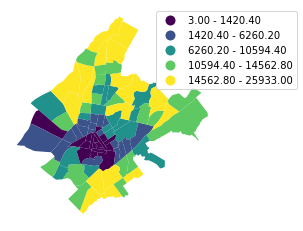

In [69]:
ax = gdf.plot(column="Population", scheme='QUANTILES', legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((1.4,1))

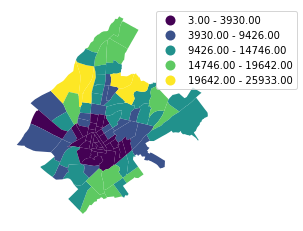

In [70]:
ax = gdf.plot(column="Population", scheme='NaturalBreaks', legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((1.4,1))

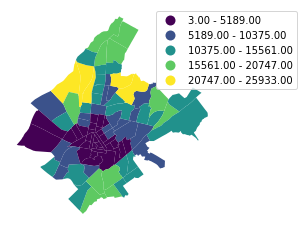

In [71]:
ax = gdf.plot(column="Population", scheme='EqualInterval', legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((1.4,1))

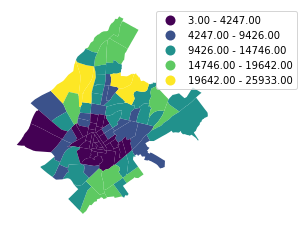

In [72]:
ax = gdf.plot(column="Population", scheme="FisherJenks", legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((1.4,1))

## Using legendgrams

Useful reference [here](https://github.com/pysal/legendgram/blob/master/examples/examples.ipynb)

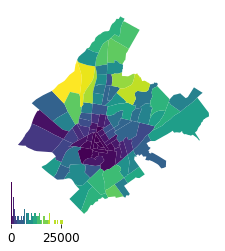

In [27]:
# Using legendgrams
ax = gdf.plot("Population")
ax.axis('off')
legendgram(plt.gcf(), # grab the figure, we need it
           ax, # the axis to add the legend
           gdf.Population, # the attribute to map
           np.percentile(gdf.Population, np.arange(10,110,10)), # the breaks to induce color differences on
           mplpal.Viridis_10 # the palette to use
          )
